<a href="https://colab.research.google.com/github/1X-HE/OKOKqm2/blob/main/room_type_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Success: Loaded data with 96871 listings.

=== Top 5 Boroughs by Commercialization Rate (High Risk) ===
Risk_Category           Commercialization_Rate
neighbourhood                                 
City of London                       85.792350
Kensington and Chelsea               84.971098
Westminster                          80.439174
Hammersmith and Fulham               72.263652
Camden                               69.439780


<Figure size 1500x800 with 0 Axes>

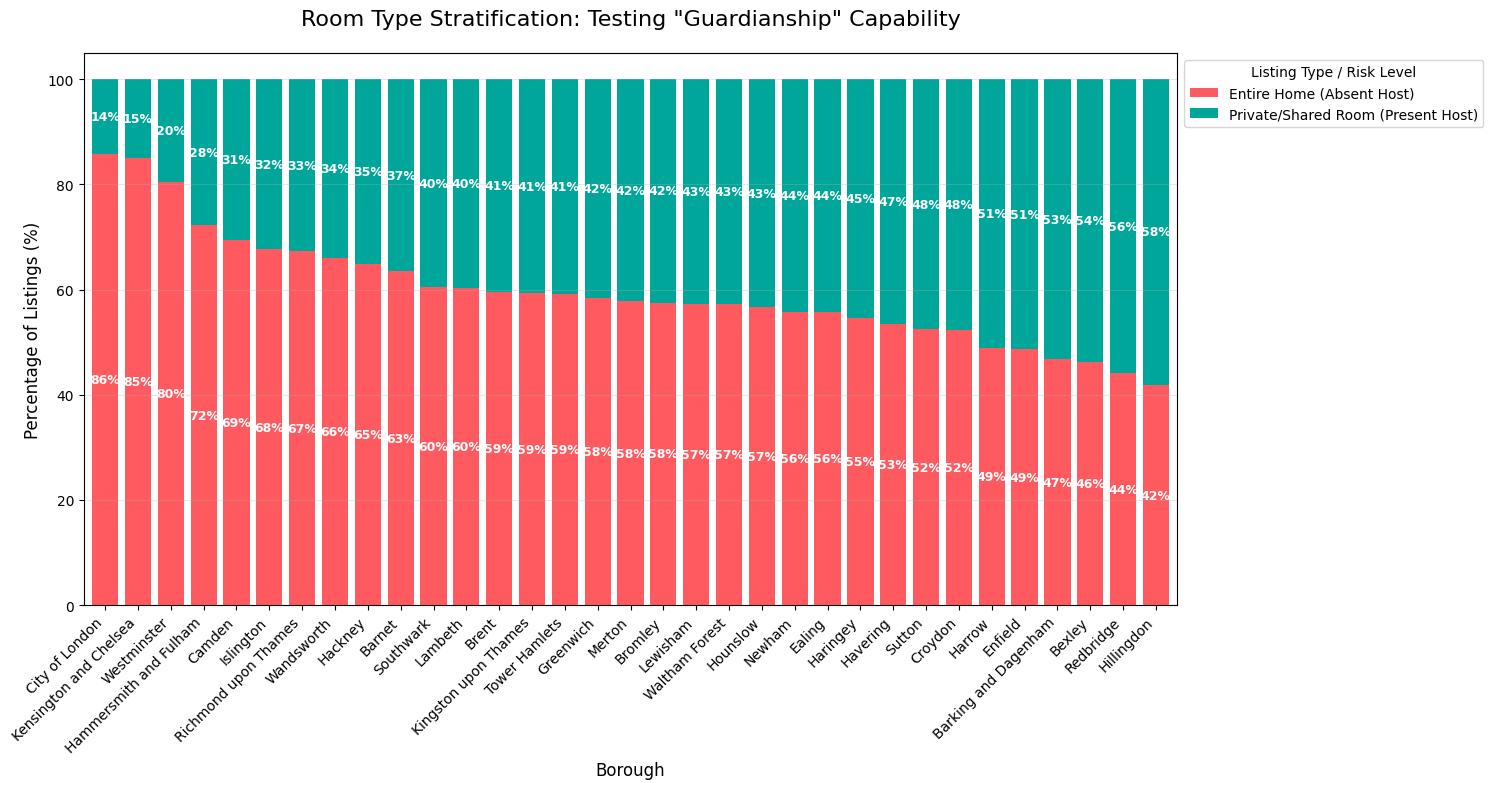

Chart successfully saved as: room_type_stratification.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. Data Ingestion
# ==========================================
# Load the 'Summary' version of the listings file
file_path = 'listings.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Success: Loaded data with {len(df)} listings.")
except FileNotFoundError:
    print("Error: 'listings.csv' not found. Please ensure the file is in the current directory.")

# ==========================================
# 2. Data Cleaning & Categorization
# ==========================================
# Standardize borough column name (London data usually uses 'neighbourhood')
if 'neighbourhood' not in df.columns:
    if 'neighbourhood_cleansed' in df.columns:
        df['neighbourhood'] = df['neighbourhood_cleansed']

# Define Risk Categories based on Routine Activity Theory
# Entire home/apt = Host Absent (High Burglary Risk)
# Private/Shared room = Host Present (Capable Guardianship)

def categorize_risk(room_type):
    if room_type == 'Entire home/apt':
        return 'Entire Home (Absent Host)'
    else:
        return 'Private/Shared Room (Present Host)'

# Apply the categorization
df['Risk_Category'] = df['room_type'].apply(categorize_risk)

# ==========================================
# 3. Metric Calculation: Commercialization Rate
# ==========================================
# Group by Borough and Risk Category
borough_stats = df.groupby(['neighbourhood', 'Risk_Category']).size().unstack(fill_value=0)

# Calculate Total Listings per Borough
borough_stats['Total'] = borough_stats.sum(axis=1)

# Calculate "Commercialization Rate" (% of Entire Homes)
borough_stats['Commercialization_Rate'] = (borough_stats['Entire Home (Absent Host)'] / borough_stats['Total']) * 100

# Sort by Commercialization Rate (High to Low)
borough_stats = borough_stats.sort_values('Commercialization_Rate', ascending=False)

# Display Top 5 "Most Commercialized" Boroughs
print("\n=== Top 5 Boroughs by Commercialization Rate (High Risk) ===")
print(borough_stats[['Commercialization_Rate']].head())

# ==========================================
# 4. Visualization: Stacked Bar Chart
# ==========================================
plt.figure(figsize=(15, 8))

# Select only the two relevant columns for plotting
plot_data = borough_stats[['Entire Home (Absent Host)', 'Private/Shared Room (Present Host)']]

# Normalize data to 100% for the stacked chart
plot_data_pct = plot_data.div(plot_data.sum(axis=1), axis=0) * 100

# Create the Stacked Bar Chart
ax = plot_data_pct.plot(
    kind='bar',
    stacked=True,
    color=['#FF5A5F', '#00A699'], # Airbnb Brand Colors (Red/Teal)
    width=0.8,
    figsize=(15, 8)
)

# Chart Aesthetics
plt.title('Room Type Stratification: Testing "Guardianship" Capability', fontsize=16, pad=20)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Percentage of Listings (%)', fontsize=12)
plt.legend(title='Listing Type / Risk Level', bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add Percentage Labels on the Bars
for c in ax.containers:
    # Optional: Filter out labels for very small segments to avoid clutter
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white', fontsize=9, fontweight='bold')

plt.tight_layout()

# Save the chart
plt.savefig('room_type_stratification.png', dpi=300)
plt.show()

print("Chart successfully saved as: room_type_stratification.png")